In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("MNIST_dataset/data.csv")

In [4]:
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
n, m = data.shape
np.random.shuffle(data)
print(f"Number of rows: {n}, Number of columns: {m}")

Number of rows: 42000, Number of columns: 785


Dataset was split into training and validation subsets. 1000 validation images.
The neural network was trained only on the training set, while all final performance metrics were computed on the unseen validation set, ensuring unbiased evaluation and generalization capability of the model.

In [6]:
data_test = data[0:1000].T # 1000 out of 42000 are validation examples
Y_test = data_test[0] # first row are labels (digits 0-9)
X_test = data_test[1:m] # pixes values 0-255
X_test = X_test / 255 # normalize values to [0,1]

data_train = data[1000:n].T
Y_train = data_train[0]
X_train = data_train[1:m]
X_train = X_train / 255

In [9]:
def init_params():
    W1 = np.random.randn(128, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * np.sqrt(2 / 128)
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def ReLU(x):
    return np.maximum(0, x)

def softmax(Z):
    shifted = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(shifted)
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [11]:
def one_hot(Y):
    one_hot_Y = np.zeros((10, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y

def deriv_ReLU(x):
    return x > 0

def backward_propagation(Z1, A1, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / Y.size * dZ2.dot(A1.T)
    db2 = 1 / Y.size * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / Y.size * dZ1.dot(X.T)
    db1 = 1 / Y.size * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [16]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def get_predictions(output):
    return np.argmax(output, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def fit(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration number: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [17]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction:", prediction)
    print("Label:", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

A subset of 5,000 images was selected from the original 41,000-image dataset for training due to computational limitations. Learning rate is set to 0.01

In [21]:
W1, b1, W2, b2 = fit(X_train, Y_train, 5000, 0.01)

Iteration number:  0
Accuracy:  0.11765853658536585
Iteration number:  100
Accuracy:  0.6503170731707317
Iteration number:  200
Accuracy:  0.7709512195121951
Iteration number:  300
Accuracy:  0.8123658536585366
Iteration number:  400
Accuracy:  0.8329024390243902
Iteration number:  500
Accuracy:  0.8460243902439024
Iteration number:  600
Accuracy:  0.8564634146341463
Iteration number:  700
Accuracy:  0.8640731707317073
Iteration number:  800
Accuracy:  0.8694146341463415
Iteration number:  900
Accuracy:  0.8746829268292683
Iteration number:  1000
Accuracy:  0.8784146341463415
Iteration number:  1100
Accuracy:  0.8823414634146342
Iteration number:  1200
Accuracy:  0.8856341463414634
Iteration number:  1300
Accuracy:  0.8880731707317073
Iteration number:  1400
Accuracy:  0.8909512195121951
Iteration number:  1500
Accuracy:  0.8929268292682927
Iteration number:  1600
Accuracy:  0.8948048780487805
Iteration number:  1700
Accuracy:  0.8961219512195122
Iteration number:  1800
Accuracy:  0.89

Prediction: [8]
Label: 8


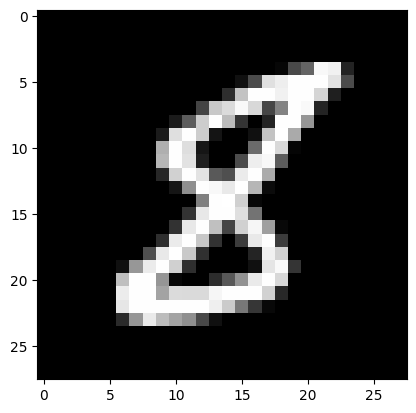

In [24]:
test_prediction(34, W1, b1, W2, b2)

In [27]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

np.float64(0.916)